In [1]:
# 비지도 학습(unsupervised learning) - 예측대상이 없다.

# - 분류분석의 label을 위한 전처리 작업으로 사용..
# - 예시
#   고객 - 고객(시장) 세그먼트 - 고객 그룹별 맞춤 마케팅...
#   지역 - 영업지역을 n개의 영업구역으로 나누고자 할 때, 유사한 지역끼리 묶는다
#   군복 - 2차세계 대전 시 기성복 군복을 생산.. 사람마다 치수가 다름.. 군인의 치수를 몇 개의 그룹으로 묶어서

# k_means clustering
# 군집분석의 가장 대표적인 알고리즘.

# 1. n 개의 군집을 설정 (n개 - hyper parameter)
# 2. 데이터 공간상에 random하게 n개의 점(중심점)을 찍는다
# 3. 모든 데이터를 중심점과의 거리를 계산한다..
# 4. 모든 데이터를 거리가 가까운 중심점으로 할당함.. => n개의 cluster가 생성
# 5. 중심점을 cluster의 중앙으로 이동
# 6.  3 ~ 5을 계속 반복
# 7. 더이상 중심점의 이동이 없을 때, cluster가 완성..

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_blobs 
# make_blobs : 가상의 군집데이터를 생성해주는 함수..

In [67]:
data  = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=111)

# n_samples : 데이터수
# n_features : 몇 차원데이터 (2차원 데이터)
# centers : 군집의 수
# cluster_std : 군집의 뭉침과 흩어짐 정도..
# random_state : 동일한 데이터 출력을 위한 seed값

In [68]:
data[0]  # 2차원 데이터

array([[-13.35817889,  -3.08278385],
       [ -9.61954066,  -3.72554907],
       [ -5.83869526,   6.55875784],
       [  1.95922856,  -7.27192061],
       [ -3.86442912,  -7.83818177],
       [ -7.3029341 ,  -0.34989648],
       [  1.68746526,  -2.83298451],
       [ -2.8142191 ,  -7.16567511],
       [-10.55851155,  -4.2430688 ],
       [ -1.42145258,  -7.1181325 ],
       [ -6.47660457,  -5.07458931],
       [ -1.9694693 ,   7.5666111 ],
       [  0.07927139,  -4.76276297],
       [ -0.14409416,   4.67055983],
       [ -5.50043631,  -6.02407876],
       [ -9.44838222,  -4.00099599],
       [ -9.02357439,   0.21024293],
       [ -1.43479798,   6.0981412 ],
       [ -9.70712732,  -1.97468485],
       [  1.07775548,  -2.74992412],
       [ -5.82378794,  -3.42377943],
       [ -9.48287502,  -3.72384525],
       [ -2.47195203,  -8.64004666],
       [ -0.54889365,  -8.24521777],
       [ -4.43552284,  -7.07324341],
       [  2.67210837,  -7.96713532],
       [  0.19736678,   6.61187537],
 

In [69]:
data[1]  # 각 데이터의 클러스터 번호 - 인위적으로 생성된 데이터이므로 cluster번호를 붙여줌..

array([3, 3, 1, 0, 2, 3, 0, 2, 3, 2, 2, 1, 0, 1, 2, 3, 3, 1, 3, 0, 3, 3,
       2, 2, 2, 0, 1, 2, 2, 3, 1, 0, 0, 3, 1, 0, 2, 2, 3, 1, 0, 0, 2, 0,
       1, 0, 3, 3, 0, 0, 3, 1, 0, 3, 2, 0, 0, 1, 3, 2, 3, 1, 1, 2, 3, 2,
       0, 2, 0, 3, 3, 3, 1, 1, 2, 1, 0, 1, 1, 1, 2, 3, 1, 0, 2, 3, 1, 0,
       3, 2, 1, 0, 1, 3, 3, 0, 3, 0, 1, 2, 1, 2, 0, 0, 3, 1, 0, 2, 3, 0,
       2, 0, 1, 2, 2, 3, 3, 2, 2, 3, 3, 2, 1, 3, 1, 2, 1, 3, 0, 0, 2, 2,
       3, 0, 1, 0, 1, 1, 0, 1, 3, 1, 3, 0, 0, 2, 1, 3, 0, 0, 2, 1, 0, 3,
       3, 0, 1, 3, 1, 1, 3, 3, 2, 2, 2, 0, 2, 2, 1, 3, 2, 1, 1, 1, 2, 1,
       1, 2, 3, 1, 0, 3, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 3, 2,
       3, 1])

In [70]:
len(data[0])

200

In [71]:
data[0][:5]

array([[-13.35817889,  -3.08278385],
       [ -9.61954066,  -3.72554907],
       [ -5.83869526,   6.55875784],
       [  1.95922856,  -7.27192061],
       [ -3.86442912,  -7.83818177]])

In [72]:
data[0][:, 0][:5]

array([-13.35817889,  -9.61954066,  -5.83869526,   1.95922856,
        -3.86442912])

In [73]:
data[0][:, 1][:5]

array([-3.08278385, -3.72554907,  6.55875784, -7.27192061, -7.83818177])

In [74]:
x = data[0][:, 0]
y = data[0][:, 1]

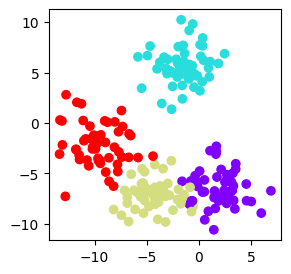

In [76]:
plt.figure(figsize=(3,3))
plt.scatter(x,y, c=data[1], cmap='rainbow')

In [77]:
from sklearn.cluster import KMeans

In [102]:
km = KMeans(n_clusters= 4) # n_clusters : hyper parmeter

In [103]:
km.fit(data[0])

C:\Users\YONSAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [104]:
km.cluster_centers_

array([[-9.84190209, -2.0400914 ],
       [-1.49667413,  5.670962  ],
       [-4.54534001, -6.87318569],
       [ 1.87830521, -6.55069721]])

In [105]:
km.labels_

array([0, 0, 1, 3, 2, 0, 3, 2, 0, 2, 2, 1, 3, 1, 2, 0, 0, 1, 0, 3, 2, 0,
       2, 3, 2, 3, 1, 2, 2, 0, 1, 3, 3, 0, 1, 3, 2, 2, 0, 1, 3, 3, 2, 3,
       1, 3, 0, 0, 3, 3, 0, 1, 3, 0, 2, 3, 3, 1, 0, 2, 0, 1, 1, 2, 0, 2,
       3, 2, 3, 0, 0, 2, 1, 1, 2, 1, 3, 1, 1, 1, 2, 0, 1, 3, 2, 0, 1, 3,
       0, 2, 1, 3, 1, 0, 0, 3, 0, 3, 1, 2, 1, 2, 3, 3, 0, 1, 3, 2, 0, 2,
       2, 3, 1, 2, 2, 0, 0, 2, 3, 0, 0, 2, 1, 0, 1, 2, 1, 0, 3, 3, 2, 2,
       0, 3, 1, 3, 1, 1, 3, 1, 0, 1, 0, 3, 3, 2, 1, 0, 3, 3, 2, 1, 3, 0,
       0, 3, 1, 0, 1, 1, 0, 0, 2, 2, 2, 3, 2, 3, 1, 0, 2, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 3, 0, 2, 3, 3, 2, 2, 1, 3, 3, 2, 2, 3, 3, 3, 1, 0, 2,
       0, 1])

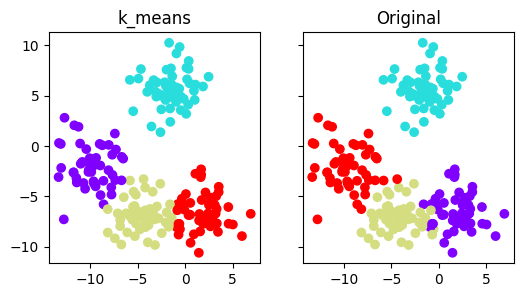

In [106]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(6,3))

ax1.set_title('k_means')
ax1.scatter(data[0][:,0], data[0][:,1], c=km.labels_, cmap='rainbow')

ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')